In [1]:
import evoalgfunc
import EvolutionaryAlgorithm
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('bmh')

In [2]:
G = evoalgfunc.generate_bipartite_weighted_graph(5, 5, max_weight=100)

In [3]:
# Testing graph creation

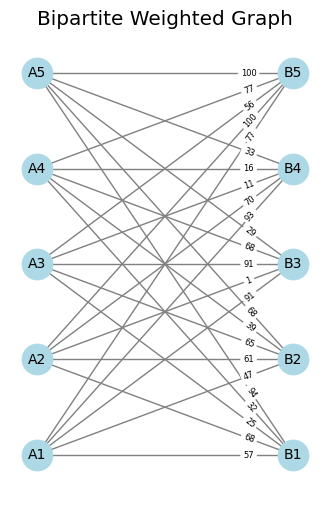

In [4]:
evoalgfunc.plot_bipartite_graph(G)

In [5]:
# Initialize the Evolutionary Algorithm instance
ea = EvolutionaryAlgorithm.EvolutionaryAlgorithm(G,
                                                 population_size=10,
                                                 generations=20,
                                                 crossover_prob=0.8,
                                                 mutation_prob=0.1,
                                                 elitism_type="strict",
                                                 elite_count=2,
                                                 selection="tournament",
                                                 seed=42)

In [6]:
# Run the process
best_solution, best_score, best_solutions, best_scores = ea.run()

Final Generation Best Score = 169.0


In [7]:
best_solution

[('A1', 'B2'), ('A2', 'B3'), ('A3', 'B5'), ('A4', 'B1'), ('A5', 'B4')]

In [8]:
best_score

169.0

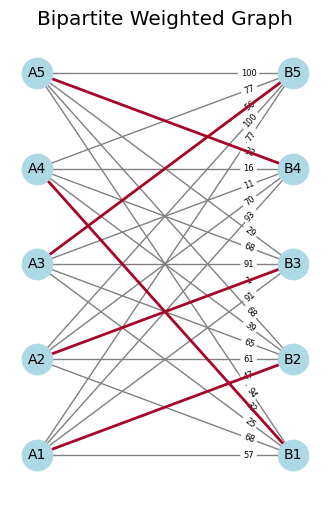

<Figure size 640x480 with 0 Axes>

In [9]:
# Plot the best solution
evoalgfunc.plot_bipartite_graph(G, best_solution)
plt.savefig(r'simple_example_solution.png',
            #bbox_extra_artists=(legend,),
            bbox_inches='tight', 
            transparent=True
            #dpi=200
           )

In [10]:
from scipy.optimize import linear_sum_assignment

In [11]:
# Extract the cost matrix for the Hungarian algorithm
side1 = [n for n, d in G.nodes(data=True) if d["bipartite"] == 0]
side2 = [n for n, d in G.nodes(data=True) if d["bipartite"] == 1]
cost_matrix = np.zeros((len(side1), len(side2)))
for i, u in enumerate(side1):
    for j, v in enumerate(side2):
        if G.has_edge(u, v):
            cost_matrix[i, j] = G[u][v]["weight"]
        else:
            cost_matrix[i, j] = np.inf  # Penalize missing edges

# Solve the assignment problem using the Hungarian algorithm
row_ind, col_ind = linear_sum_assignment(cost_matrix)
optimal_solution = cost_matrix[row_ind, col_ind].sum()

In [12]:
best_solution = [(side1[i], side2[j]) for i, j in zip(row_ind, col_ind)]

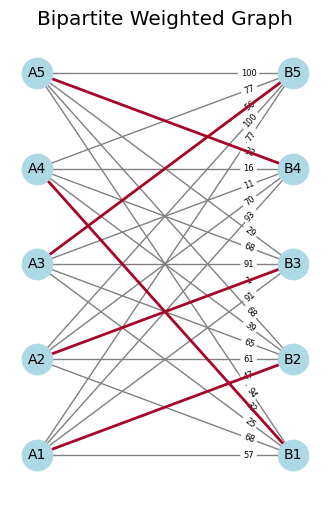

In [13]:
evoalgfunc.plot_bipartite_graph(G, best_solution)

# Tests for larger sample

In [14]:
# The optimal assignment in general

In [15]:
G = evoalgfunc.generate_bipartite_weighted_graph(20, 20, max_weight=100)

In [16]:
# Extract the cost matrix for the Hungarian algorithm
side1 = [n for n, d in G.nodes(data=True) if d["bipartite"] == 0]
side2 = [n for n, d in G.nodes(data=True) if d["bipartite"] == 1]
cost_matrix = np.zeros((len(side1), len(side2)))
for i, u in enumerate(side1):
    for j, v in enumerate(side2):
        if G.has_edge(u, v):
            cost_matrix[i, j] = G[u][v]["weight"]
        else:
            cost_matrix[i, j] = np.inf  # Penalize missing edges

# Solve the assignment problem using the Hungarian algorithm
row_ind, col_ind = linear_sum_assignment(cost_matrix)
optimal_solution = cost_matrix[row_ind, col_ind].sum()

In [17]:
optimal_solution

167.0

In [18]:
best_solution = [(side1[i], side2[j]) for i, j in zip(row_ind, col_ind)]

In [19]:
# latex style
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "monospace",
    "font.monospace": 'Computer Modern Typewriter'
})

In [20]:
parameter_configs = [
    {"population_size": 50, "crossover_prob": 0.8, "mutation_prob": 0.15, "elitism_type": "strict", "selection": "tournament"},
    {"population_size": 100, "crossover_prob": 0.8, "mutation_prob": 0.15, "elitism_type": "strict", "selection": "tournament"},
    {"population_size": 150, "crossover_prob": 0.8, "mutation_prob": 0.15, "elitism_type": "strict", "selection": "tournament"},
    {"population_size": 50, "crossover_prob": 0.8, "mutation_prob": 0.15, "elitism_type": "strict", "selection": "roulette"},
    {"population_size": 100, "crossover_prob": 0.8, "mutation_prob": 0.15, "elitism_type": "strict", "selection": "roulette"},
    {"population_size": 150, "crossover_prob": 0.8, "mutation_prob": 0.15, "elitism_type": "strict", "selection": "roulette"},
    {"population_size": 50, "crossover_prob": 0.8, "mutation_prob": 0.15, "elitism_type": "strict", "selection": "random"},
    {"population_size": 100, "crossover_prob": 0.8, "mutation_prob": 0.15, "elitism_type": "strict", "selection": "random"},
    {"population_size": 150, "crossover_prob": 0.8, "mutation_prob": 0.15, "elitism_type": "strict", "selection": "random"},
]

In [21]:
generations = 5000
results = {}

for i, config in enumerate(parameter_configs):
    print(f"Running configuration {i + 1}: {config}")
    ea = EvolutionaryAlgorithm.EvolutionaryAlgorithm(G,
                                                     population_size=config["population_size"],
                                                     generations=generations,
                                                     crossover_prob=config["crossover_prob"],
                                                     mutation_prob=config["mutation_prob"],
                                                     elitism_type=config["elitism_type"],
                                                     selection=config["selection"],
                                                     seed=42
                                                    )
    _, _, _, best_scores = ea.run()
    results[f"selection: {config['selection']}, population_size: {config['population_size']}"] = best_scores

Running configuration 1: {'population_size': 50, 'crossover_prob': 0.8, 'mutation_prob': 0.15, 'elitism_type': 'strict', 'selection': 'tournament'}
Final Generation Best Score = 196.0
Running configuration 2: {'population_size': 100, 'crossover_prob': 0.8, 'mutation_prob': 0.15, 'elitism_type': 'strict', 'selection': 'tournament'}
Final Generation Best Score = 179.0
Running configuration 3: {'population_size': 150, 'crossover_prob': 0.8, 'mutation_prob': 0.15, 'elitism_type': 'strict', 'selection': 'tournament'}
Final Generation Best Score = 174.0
Running configuration 4: {'population_size': 50, 'crossover_prob': 0.8, 'mutation_prob': 0.15, 'elitism_type': 'strict', 'selection': 'roulette'}
Final Generation Best Score = 316.0
Running configuration 5: {'population_size': 100, 'crossover_prob': 0.8, 'mutation_prob': 0.15, 'elitism_type': 'strict', 'selection': 'roulette'}
Final Generation Best Score = 183.0
Running configuration 6: {'population_size': 150, 'crossover_prob': 0.8, 'mutatio

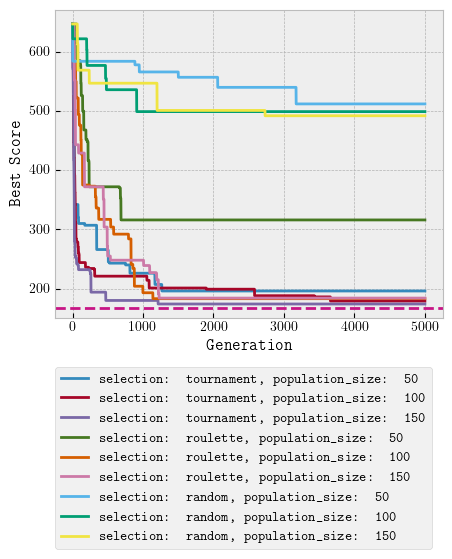

In [22]:
plt.figure(figsize=(5, 4))
for label, scores in results.items():
    plt.plot(range(1, len(scores) + 1), scores, label=label)

plt.axhline(optimal_solution, linestyle='--', color='mediumvioletred')

#plt.title("Generation vs Best Scores for Different Parameter Configurations")
plt.xlabel("Generation")
plt.ylabel("Best Score")
plt.legend(loc='lower left', bbox_to_anchor=(0, -0.75), borderaxespad=0.)
plt.grid(True)

plt.savefig(r'EA_test.png',
            #bbox_extra_artists=(legend,),
            bbox_inches='tight', 
            #dpi=200
            transparent=True
           )
plt.show()

In [23]:
parameter_configs = [
    {"population_size": 150, "crossover_prob": 0.7, "mutation_prob": 0.15, "elitism_type": "strict", "selection": "tournament"},
    {"population_size": 150, "crossover_prob": 0.8, "mutation_prob": 0.15, "elitism_type": "strict", "selection": "tournament"},
    {"population_size": 150, "crossover_prob": 0.9, "mutation_prob": 0.15, "elitism_type": "strict", "selection": "tournament"},
]

In [24]:
generations = 5000
results = {}

for i, config in enumerate(parameter_configs):
    print(f"Running configuration {i + 1}: {config}")
    ea = EvolutionaryAlgorithm.EvolutionaryAlgorithm(G,
                                                     population_size=config["population_size"],
                                                     generations=generations,
                                                     crossover_prob=config["crossover_prob"],
                                                     mutation_prob=config["mutation_prob"],
                                                     elitism_type=config["elitism_type"],
                                                     selection=config["selection"],
                                                     seed=42
                                                    )
    _, _, _, best_scores = ea.run()
    results[f"selection: {config['selection']}, crossover_prob: {config['crossover_prob']}"] = best_scores

Running configuration 1: {'population_size': 150, 'crossover_prob': 0.7, 'mutation_prob': 0.15, 'elitism_type': 'strict', 'selection': 'tournament'}
Final Generation Best Score = 178.0
Running configuration 2: {'population_size': 150, 'crossover_prob': 0.8, 'mutation_prob': 0.15, 'elitism_type': 'strict', 'selection': 'tournament'}
Final Generation Best Score = 174.0
Running configuration 3: {'population_size': 150, 'crossover_prob': 0.9, 'mutation_prob': 0.15, 'elitism_type': 'strict', 'selection': 'tournament'}
Final Generation Best Score = 174.0


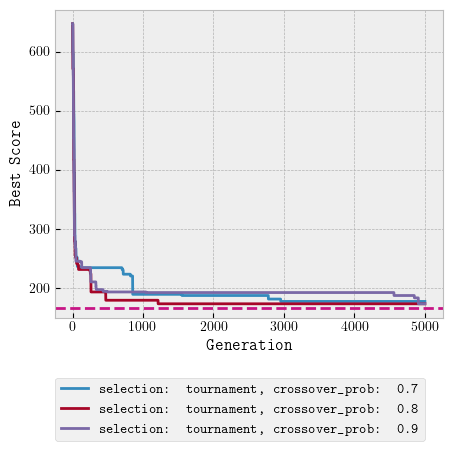

In [25]:
plt.figure(figsize=(5, 4))
for label, scores in results.items():
    plt.plot(range(1, len(scores) + 1), scores, label=label)
plt.axhline(optimal_solution, linestyle='--', color='mediumvioletred')

#plt.title("Generation vs Best Scores for Different Parameter Configurations")
plt.xlabel("Generation")
plt.ylabel("Best Score")
plt.legend(loc='lower left', bbox_to_anchor=(0, -0.4), borderaxespad=0.)
plt.grid(True)

plt.savefig(r'EA_test_crossover.png',
            #bbox_extra_artists=(legend,),
            bbox_inches='tight',
            transparent=True
            #dpi=200
           )
plt.show()

In [26]:
parameter_configs = [
    {"population_size": 150, "crossover_prob": 0.8, "mutation_prob": 0.1, "elitism_type": "strict", "selection": "tournament"},
    {"population_size": 150, "crossover_prob": 0.8, "mutation_prob": 0.2, "elitism_type": "strict", "selection": "tournament"},
    {"population_size": 150, "crossover_prob": 0.8, "mutation_prob": 0.3, "elitism_type": "strict", "selection": "tournament"},
]

In [27]:
generations = 5000
results = {}

for i, config in enumerate(parameter_configs):
    print(f"Running configuration {i + 1}: {config}")
    ea = EvolutionaryAlgorithm.EvolutionaryAlgorithm(G,
                                                     population_size=config["population_size"],
                                                     generations=generations,
                                                     crossover_prob=config["crossover_prob"],
                                                     mutation_prob=config["mutation_prob"],
                                                     elitism_type=config["elitism_type"],
                                                     selection=config["selection"],
                                                     seed=42
                                                    )
    _, _, _, best_scores = ea.run()
    results[f"selection: {config['selection']}, mutation_prob: {config['mutation_prob']}"] = best_scores

Running configuration 1: {'population_size': 150, 'crossover_prob': 0.8, 'mutation_prob': 0.1, 'elitism_type': 'strict', 'selection': 'tournament'}
Final Generation Best Score = 167.0
Running configuration 2: {'population_size': 150, 'crossover_prob': 0.8, 'mutation_prob': 0.2, 'elitism_type': 'strict', 'selection': 'tournament'}
Final Generation Best Score = 178.0
Running configuration 3: {'population_size': 150, 'crossover_prob': 0.8, 'mutation_prob': 0.3, 'elitism_type': 'strict', 'selection': 'tournament'}
Final Generation Best Score = 205.0


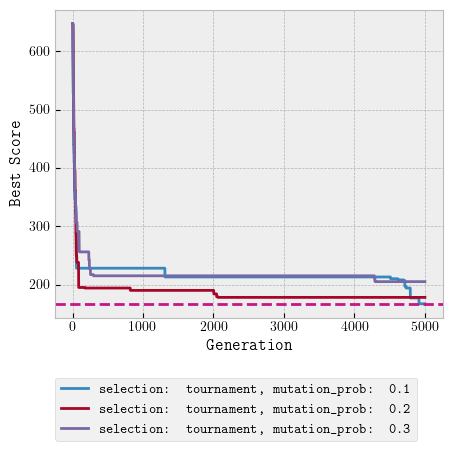

In [28]:
plt.figure(figsize=(5, 4))
for label, scores in results.items():
    plt.plot(range(1, len(scores) + 1), scores, label=label)
plt.axhline(optimal_solution, linestyle='--', color='mediumvioletred')

#plt.title("Generation vs Best Scores for Different Parameter Configurations")
plt.xlabel("Generation")
plt.ylabel("Best Score")
plt.legend(loc='lower left', bbox_to_anchor=(0, -0.4), borderaxespad=0.)
plt.grid(True)

plt.savefig(r'EA_test_mutation.png',
            #bbox_extra_artists=(legend,),
            bbox_inches='tight', 
            transparent=True
            #dpi=200
           )
plt.show()